<a href="https://colab.research.google.com/github/krmacit/Neural-Networks-Deep-Learning/blob/master/SWE591_Project1_Part2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.display import Image
from sklearn.manifold import TSNE

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

tf.random.set_seed(113)
np.random.seed(113)

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = np.reshape(x_train, (60000,28,28,1))
x_test = np.reshape(x_test, (10000,28,28,1))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
autoencoder = Sequential(name='AutoEncoder_CNN')

autoencoder.add(Conv2D(16,
                       kernel_size=(5, 5), 
                       activation='relu', 
                       input_shape=(28,28,1), 
                       padding='same',
                       name='Convolution_Layer_1'))
autoencoder.add(MaxPooling2D(pool_size=(2, 2),
                       name='Pooling_Layer_1'))
autoencoder.add(Conv2D(32, 
                       kernel_size=(5, 5), 
                       activation='relu',
                       padding='same',
                       name='Convolution_Layer_2'))
autoencoder.add(MaxPooling2D(pool_size=(2, 2),
                       name='Pooling_Layer_2'))
autoencoder.add(Flatten(name='Flatten'))
autoencoder.add(Dense(16, activation='relu', name= 'Latent_Layer'))
autoencoder.add(Dense(64, activation='relu', name= 'Decoder_Layer_1'))
autoencoder.add(Dense(196, activation='relu', name= 'Decoder_Layer_2'))
autoencoder.add(Dense(784, activation='relu', name= 'Output_Layer'))
autoencoder.add(Reshape((28, 28, 1)))

In [0]:
autoencoder.summary()

Model: "AutoEncoder_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolution_Layer_1 (Conv2D) (None, 28, 28, 16)        416       
_________________________________________________________________
Pooling_Layer_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
Convolution_Layer_2 (Conv2D) (None, 14, 14, 32)        12832     
_________________________________________________________________
Pooling_Layer_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
Latent_Layer (Dense)         (None, 16)                25104     
_________________________________________________________________
Decoder_Layer_1 (Dense)      (None, 64)            

In [0]:
adam = tf.keras.optimizers.Adam()
autoencoder.compile(optimizer=adam, 
                    loss='mean_squared_error')

In [0]:
autoencoder.fit(x_train, x_train, 
                epochs = 10, 
                batch_size = 64, 
                shuffle = True, 
                validation_data= (x_test, x_test))

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0340 - val_loss: 0.0251
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0238 - val_loss: 0.0222
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0219 - val_loss: 0.0212
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0210 - val_loss: 0.0205
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0204 - val_loss: 0.0199
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0199 - val_loss: 0.0199
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0196 - val_loss: 0.0194
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0193 - val_loss: 0.0193
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0191 - val_loss: 0.0190
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0189 - val_loss: 0.0189

In [0]:
reconstructed_imgs = autoencoder.predict(x_test)

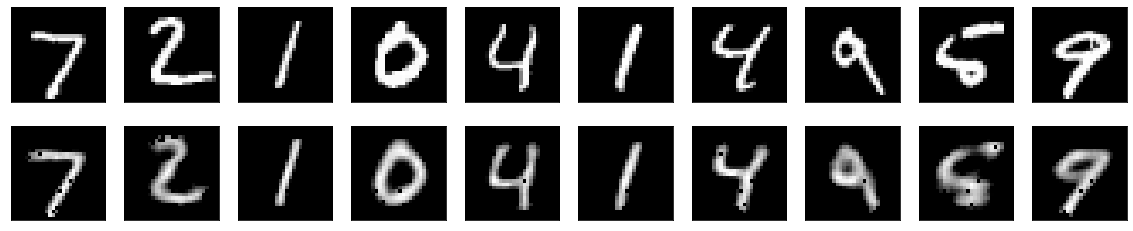

In [0]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(reconstructed_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
model = TSNE(n_components=2, random_state=0)
x_tnse = x_train
y_tnse = y_train.reshape(len(y_train),1)
tsne = model.fit_transform(x_tnse.reshape((len(x_tnse),28*28)))

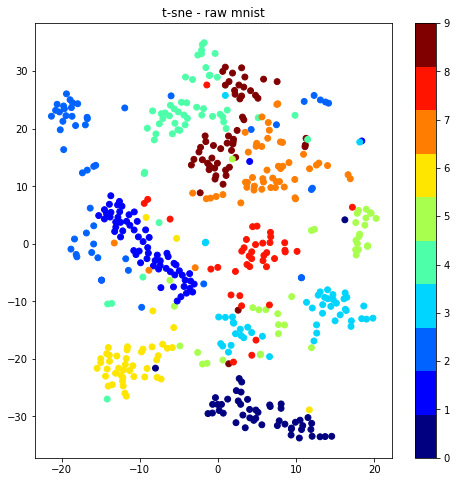

In [0]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y_tnse,s=35,cmap=cmap)
plt.title("t-sne - raw mnist")
plt.colorbar()
plt.show()

In [0]:
model = TSNE(n_components=2, random_state=0)
x_tsne = x_train
x_tsne = autoencoder.predict(x_tsne)
y_tsne = y_train.reshape(len(y_train),1)
tsne = model.fit_transform(x_tsne.reshape((len(x_tsne),28*28)))

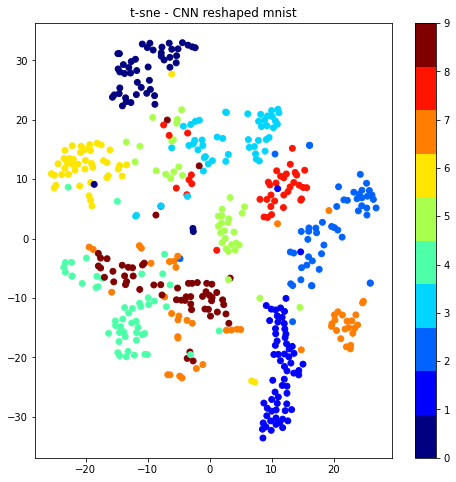

In [0]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y_tsne,s=35,cmap=cmap)
plt.title("t-sne - CNN reshaped mnist")
plt.colorbar()
plt.show()

In [0]:
plt.figure(figsize=(6, 4))
ax = plt.subplot(2, 3, 1)
plt.imshow(x_test[103].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(2, 3, 2)
plt.imshow(x_test[102].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(2, 3, 3)
plt.imshow(x_test[100].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

In [0]:
plt.figure(figsize=(6, 4))

ax = plt.subplot(2, 3, 1)
plt.imshow(reconstructed_imgs[103].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(2, 3, 2)
plt.imshow(reconstructed_imgs[102].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(2, 3, 3)
plt.imshow(reconstructed_imgs[100].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()